In [1]:
from pyiron import Project
from pyiron import ase_to_pyiron, pyiron_to_ase
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms
from scipy.optimize import curve_fit
from pyiron import Project
from pyiron import ase_to_pyiron, pyiron_to_ase
import shutil
import glob
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np 
import scipy.constants as const
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np 

In [2]:
# Import data and select as per file 
file_data = np.loadtxt('msd_na_amo_523_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams.update({'font.size': 12})
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
plt.ylim([0, 3.5e-19])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_523k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

ValueError: Wrong number of columns at line 47825

In [ ]:
# Import data and select as per file 
file_data = np.loadtxt('msd_na_amo_573_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
plt.ylim([0, 3e-19])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_573k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

Diffusion coefficient = 6.942e-12 [M^2/sec]
Diffusion coefficient = 5.576e-12 [M^2/sec]
Diffusion coefficient = 8.925e-12 [M^2/sec]
Diffusion coefficient = 7.148e-12 [M^2/sec]


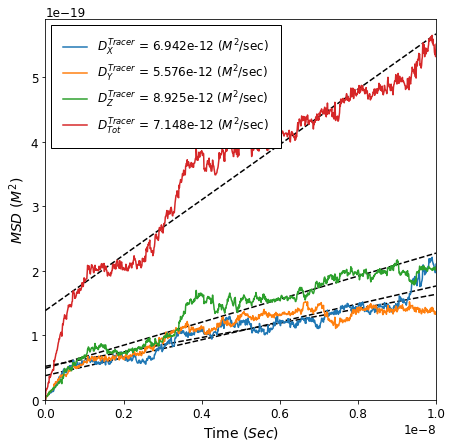

In [3]:
# Import data and select as per file 
file_data = np.loadtxt('msd_na_amo_623_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
plt.ylim([0, 5.9e-19])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_623k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [ ]:
file_data = np.loadtxt('msd_na_amo_673_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
plt.ylim([0, 3.5e-19])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_673k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [ ]:
# Import data and select as per file 
file_data = np.loadtxt('msd_na_amo_723_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
#plt.ylim([0, 1.1e-18])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_723k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [ ]:
# Import data and select as per file 
file_data = np.loadtxt('msd_na_amo_773_3.txt')
x = file_data[:,0]                 # Time 
y_x = (file_data[:,9])#**2)/162 # 17 to 20 avg, x, y, z, 3, 1,1,1 dimensions
y_y = (file_data[:,10])
y_z = (file_data[:,11])
y_tot = (file_data[:,12])
m_x = 1  # Dimensions to define for diff
m_y = 1
m_z = 1
m_tot = 3
n_x = 2*m_x
n_y = 2*m_y
n_z = 2*m_z
n_tot = 2*m_tot 

# Smoothening the data 
xy_x = np.column_stack((x, y_x))
z_x = pd.DataFrame(xy_x).groupby(0, as_index=False)[1].mean().values

xy_y = np.column_stack((x, y_y))
z_y = pd.DataFrame(xy_y).groupby(0, as_index=False)[1].mean().values

xy_z = np.column_stack((x, y_z))
z_z = pd.DataFrame(xy_z).groupby(0, as_index=False)[1].mean().values

xy_tot = np.column_stack((x, y_tot))
z_tot = pd.DataFrame(xy_tot).groupby(0, as_index=False)[1].mean().values

x_s = z_x[:, 0] 
y_x = z_x[:, 1]
y_y = z_y[:, 1]
y_z = z_z[:, 1]
y_tot = z_tot[:, 1]
    
t = x_s*1e-12       # to sec 
msd_x = y_x*1e-20     # A^2 to m^2
msd_y = y_y*1e-20     # A^2 to m^2
msd_z = y_z*1e-20     # A^2 to m^2
msd_tot = y_tot*1e-20     # A^2 to m^2

# Define the functiion to fit the curve 
def func(x, a, b):
    return a*x + b
sl = 100
x_1 = t[::sl]
y_x_1 = msd_x[::sl]
y_y_1 = msd_y[::sl]
y_z_1 = msd_z[::sl]
y_tot_1 = msd_tot[::sl]
        
popt_x, pcov_x = curve_fit(func, x_1, y_x_1)
popt_y, pcov_y = curve_fit(func, x_1, y_y_1)
popt_z, pcov_z = curve_fit(func, x_1, y_z_1)
popt_tot, pcov_tot = curve_fit(func, x_1, y_tot_1)
#print(popt[0]/2)  
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(x_1,y_x_1)
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(x_1,y_y_1)
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(x_1,y_z_1)
slope_tot, intercept_tot, r_value_tot, p_value_tot, std_err_tot = stats.linregress(x_1,y_tot_1)

print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_1/n_x))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_2/n_y))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_3/n_z))
print("Diffusion coefficient = %.3e [M^2/sec]" %(slope_tot/n_tot))

d_x = slope_1/n_x
d_y = slope_2/n_y
d_z = slope_3/n_z
d_tot = slope_tot/n_tot

        
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1e-8])
#plt.ylim([0, 2.27e-18])
plt.plot(x_1, func(x_1, *popt_x),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_y),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_z),'--',color='black')   #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1, func(x_1, *popt_tot),'--',color='black') #,label='$D_{tr}^{%s}$ = %.3e ($M^2$/sec)'%(temp,d))
plt.plot(x_1,y_x_1,label='$D_{X}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_x))     #, label='Average MSD')
plt.plot(x_1,y_y_1,label='$D_{Y}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_y))     #, label='Average MSD')
plt.plot(x_1,y_z_1,label='$D_{Z}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_z))     #, label='Average MSD')
plt.plot(x_1,y_tot_1,label='$D_{Tot}^{Tracer}$ = %.3e ($M^2$/sec)'%(d_tot)) #, label='Average MSD')
#plt.xlabel("MD steps")
#plt.ylabel("MSD")
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Tracer diffusin coefficient at 623 k (Crystal)")
plt.xlabel(r"Time ($Sec$)", fontsize=14)
plt.ylabel("$MSD\ (M^2)$",fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#, bbox_to_anchor=(1.60, 1.019))
plt.savefig('msd_crystal_amo_773k.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()